Data Set – Winequality-red

In class Assignment Expectations/Steps -

Apply Data Cleaning to the Datasets and then apply Agglomerative clustering for find pattern and the best value for the following features.

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

### 1. Use feautes fixed acidity and volatile acidity

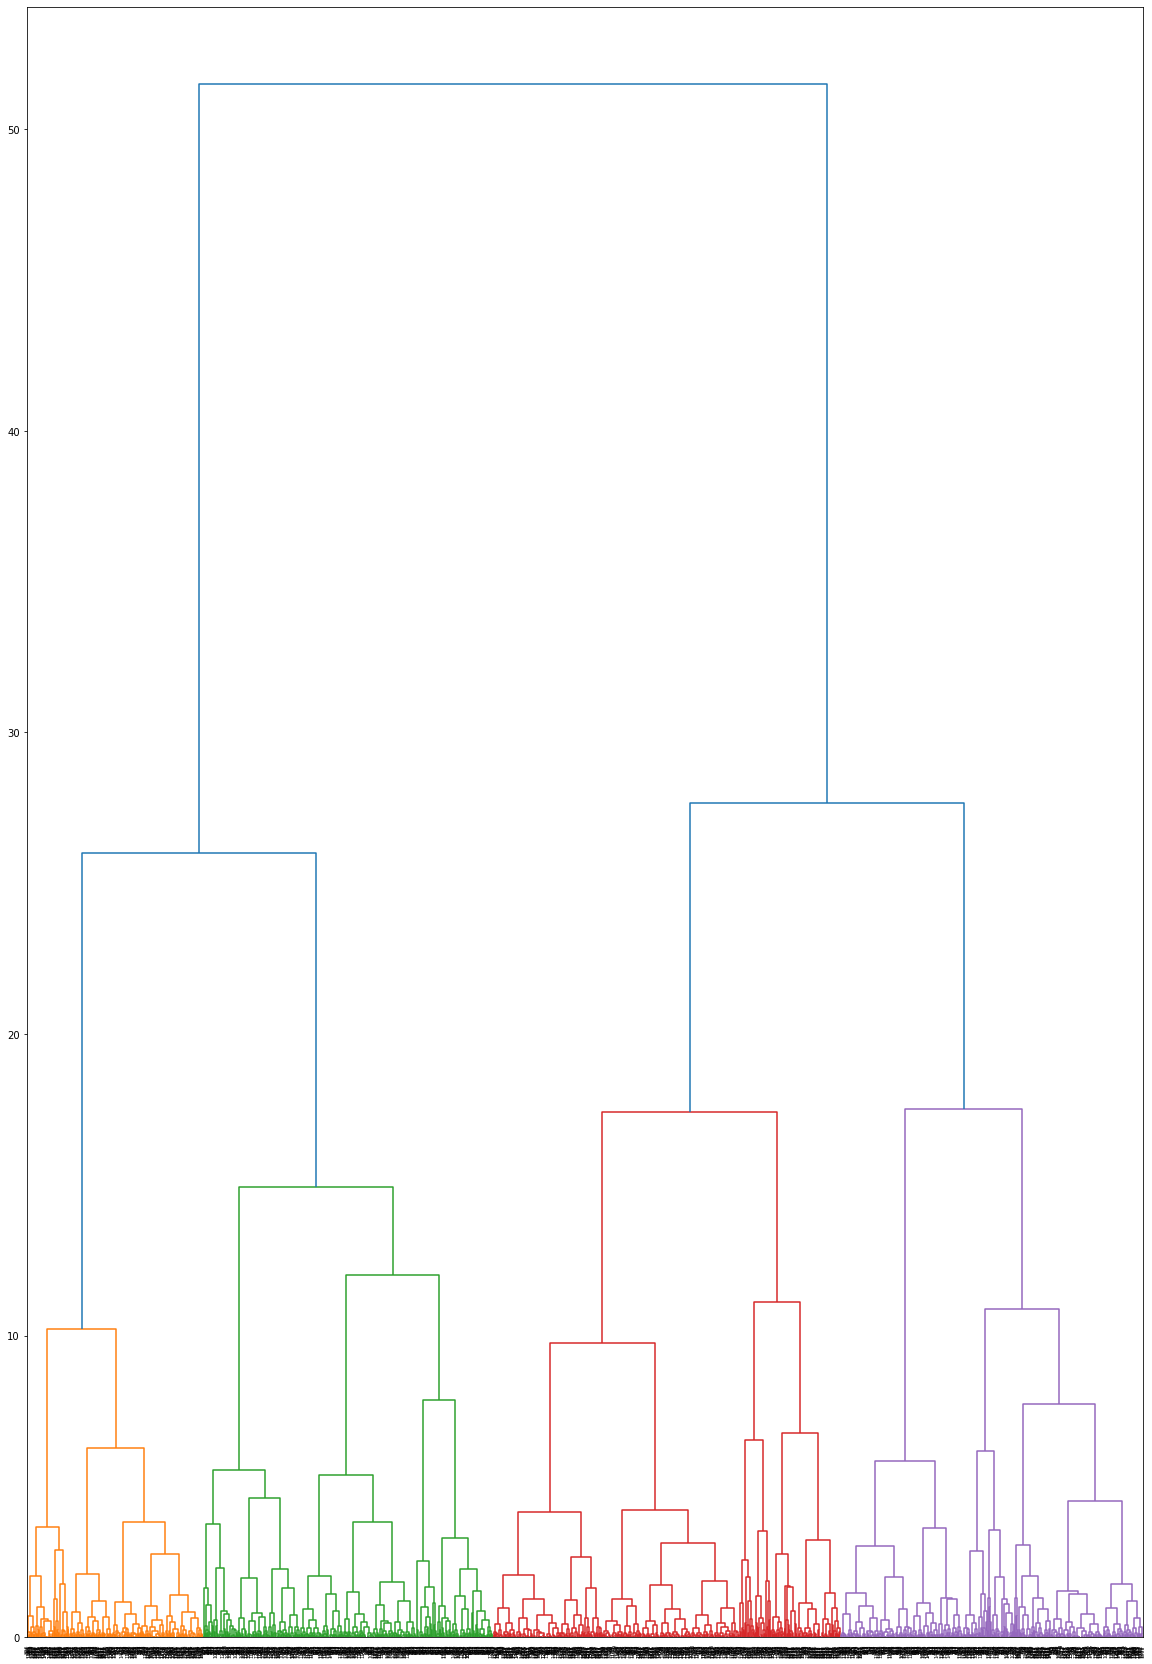

In [14]:
x1 = pd.DataFrame(pt.fit_transform(df[['fixed_acidity','volatile_acidity']]),columns=['fixed_acidity','volatile_acidity'])

plt.figure(figsize=(20,30))
z = linkage(x1,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [33]:
agc1 = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
agc1.fit(x1)

x1['class']= agc1.labels_
x1['class'].value_counts()

2    498
0    433
1    416
3    252
Name: class, dtype: int64

### 2. Use feautes Cirtic acidity and fixed acidity

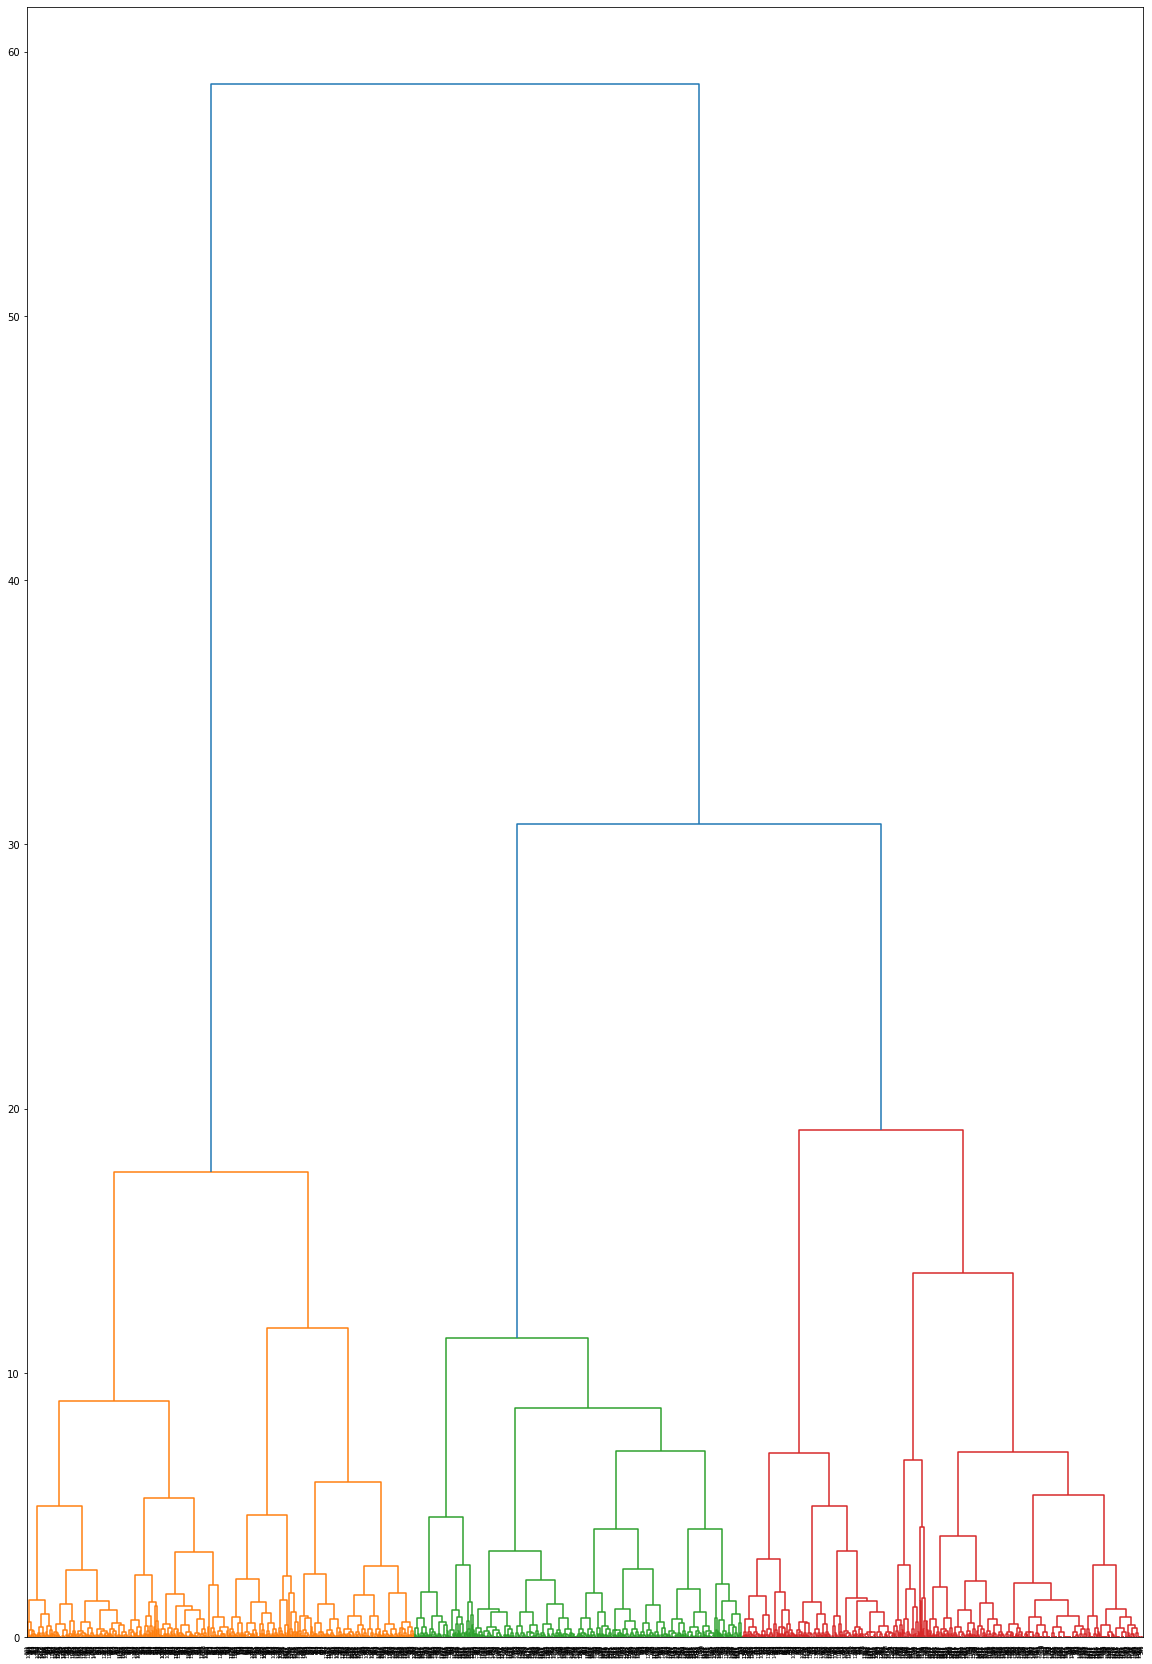

In [15]:
x2 = pd.DataFrame(pt.fit_transform(df[['fixed_acidity','citric_acid']]),columns=['fixed_acidity','citric_acid'])
plt.figure(figsize=(20,30))
z = linkage(x2,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [34]:
agc2 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc2.fit(x2)

x2['class']= agc2.labels_
x2['class'].value_counts()

0    690
1    657
2    252
Name: class, dtype: int64

### 3. Use feautes residual suger and sulphades

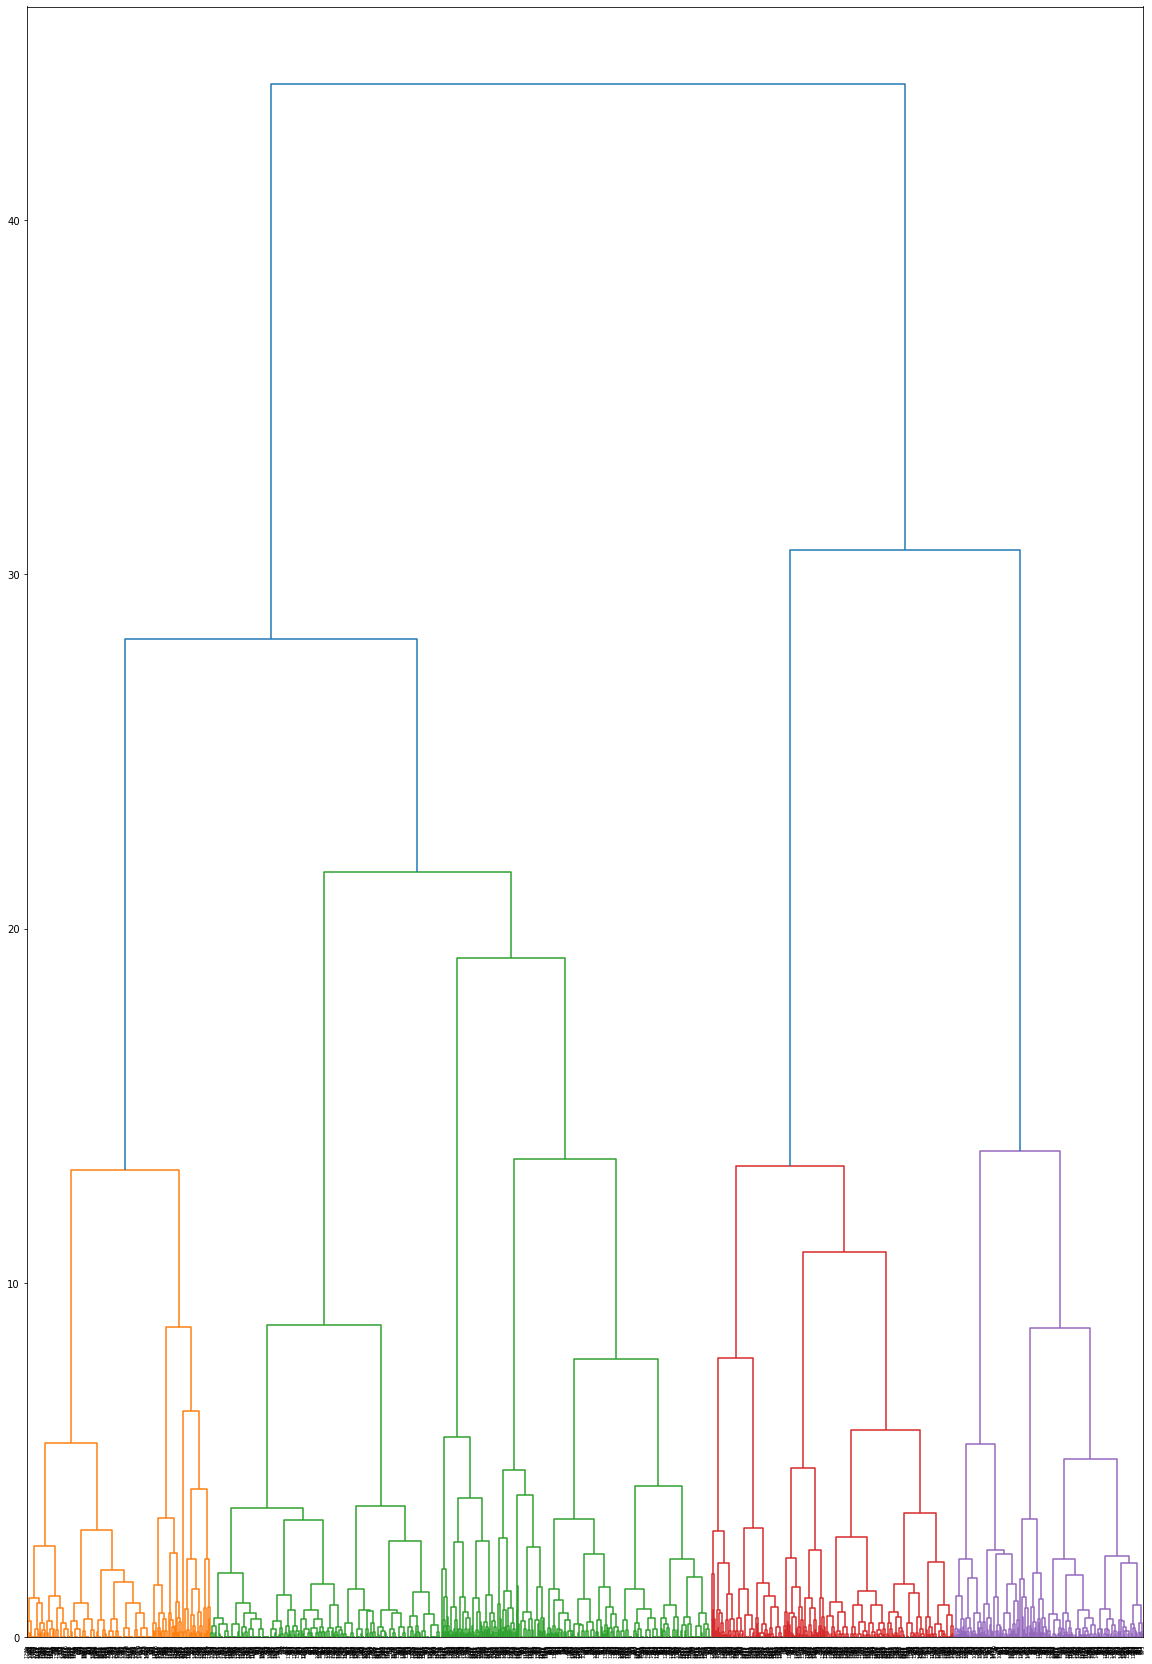

In [19]:
x3 = pd.DataFrame(pt.fit_transform(df[['residual_sugar','sulphates']]),columns=['residual_sugar','sulphates'])
plt.figure(figsize=(20,30))
z = linkage(x3,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [35]:
agc3 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc3.fit(x3)

x3['class']= agc3.labels_
x3['class'].value_counts()

0    981
2    347
1    271
Name: class, dtype: int64

### 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

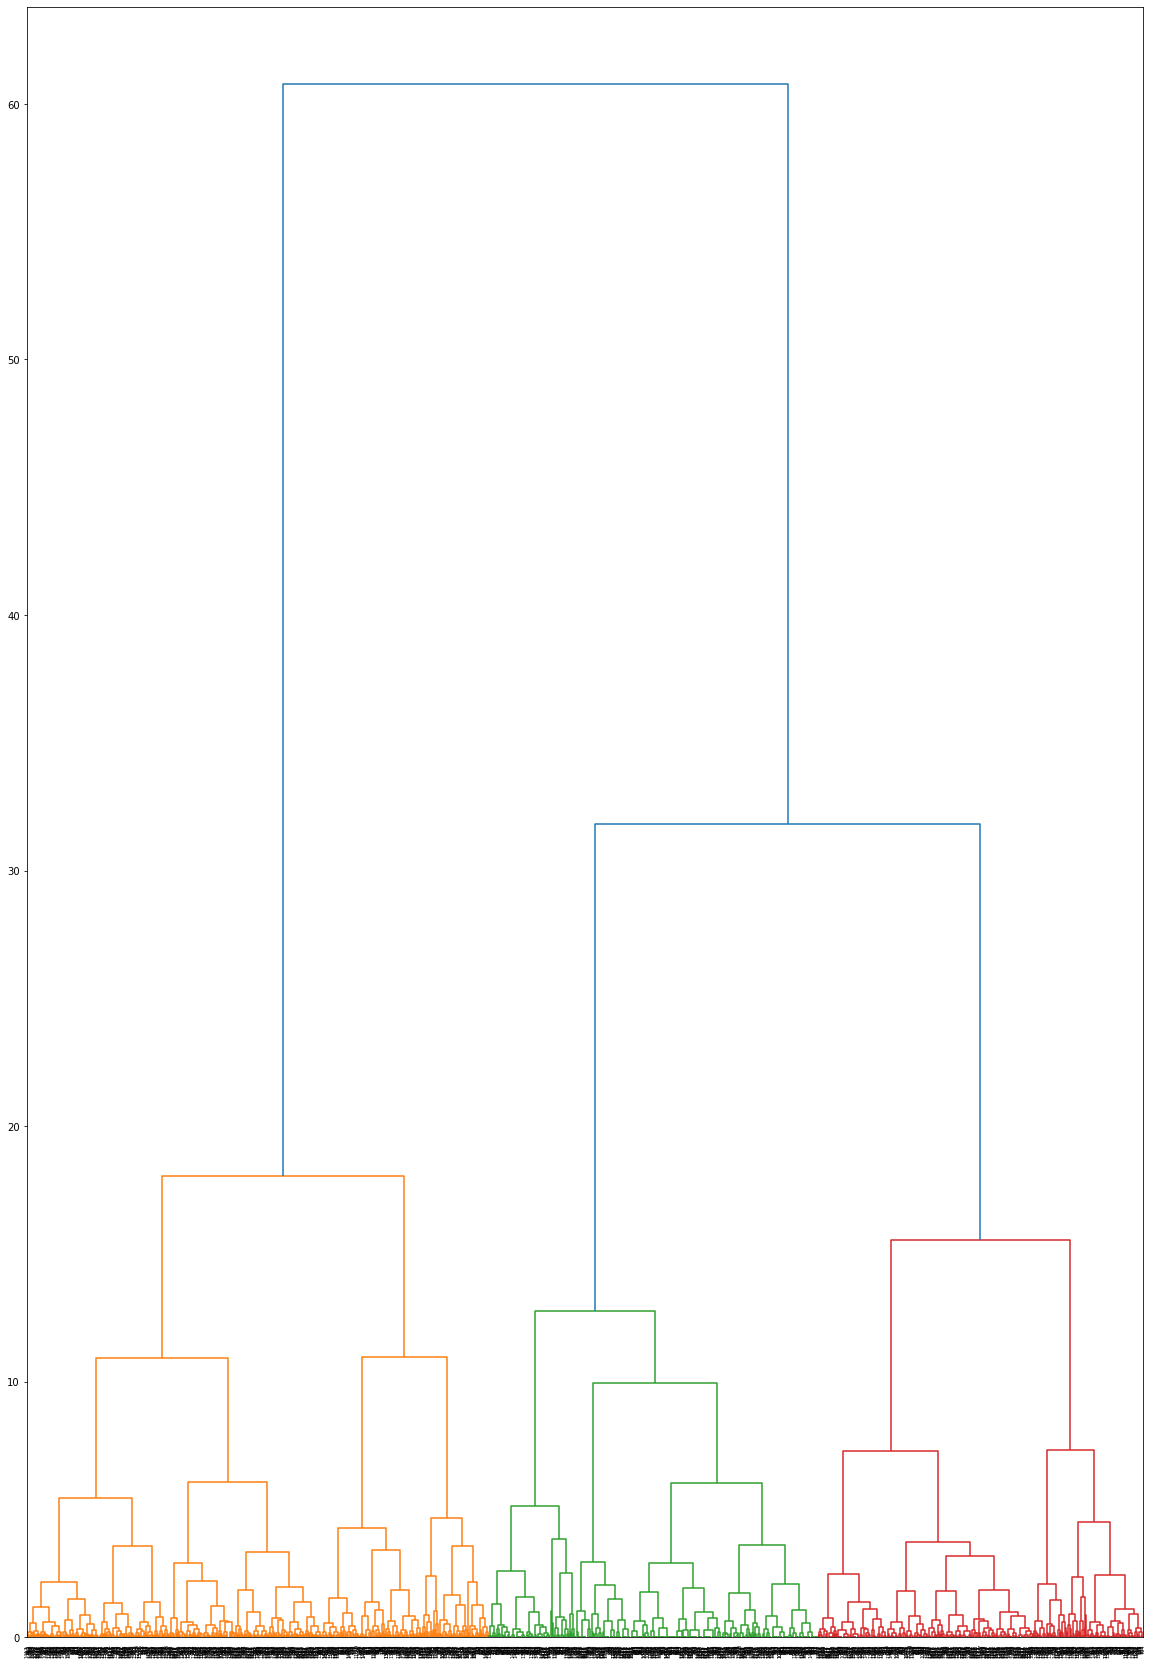

In [38]:
x4 = pd.DataFrame(pt.fit_transform(df[['free_sulfur_dioxide','total_sulfur_dioxide']]),columns=['free_sulfur_dioxide','total_sulfur_dioxide'])
plt.figure(figsize=(20,30))
z = linkage(x4,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [39]:
agc4 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc4.fit(x4)

x4['class']= agc4.labels_
x4['class'].value_counts()

0    662
2    472
1    465
Name: class, dtype: int64

### 5. Use feautes fixed acidity, citric acidity and volatile acidity

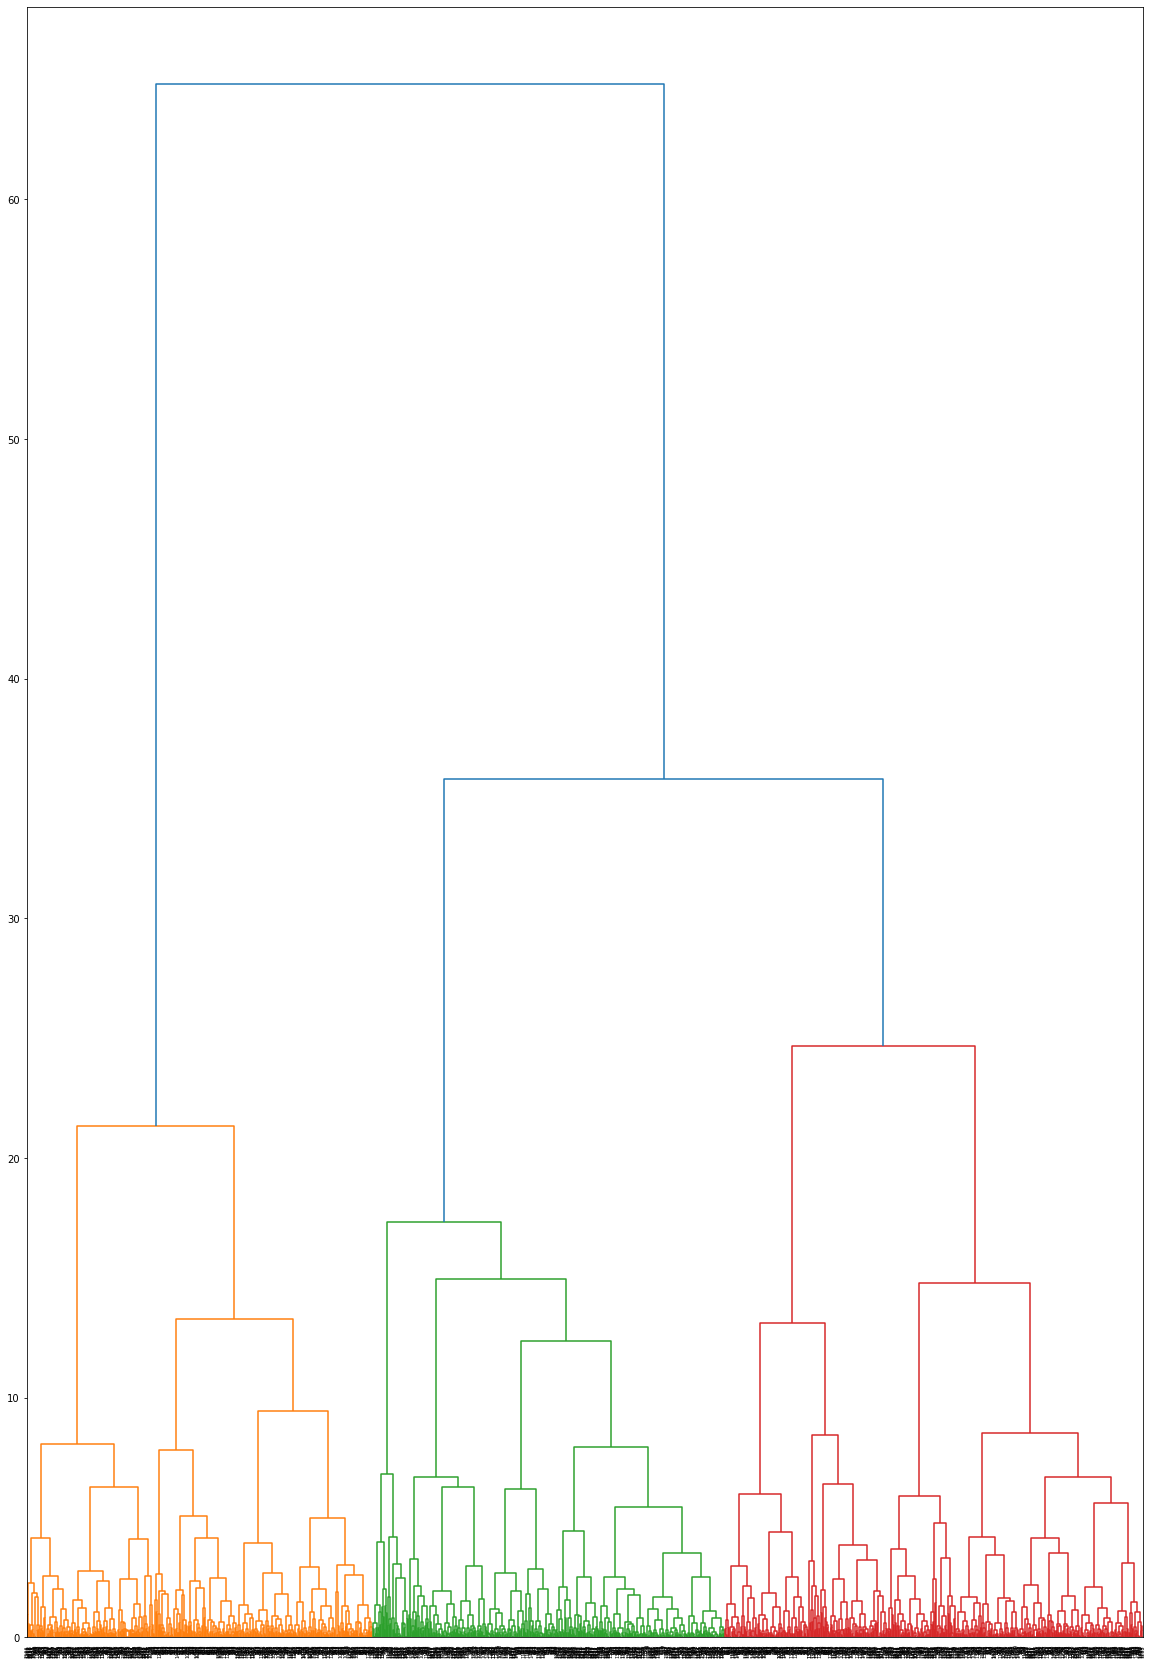

In [18]:
x5 = pd.DataFrame(pt.fit_transform(df[['fixed_acidity','citric_acid','volatile_acidity']]),columns=['fixed_acidity','citric_acid','volatile_acidity'])

plt.figure(figsize=(20,30))
z = linkage(x5,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [40]:
agc5 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc5.fit(x5)

x5['class']= agc5.labels_
x5['class'].value_counts()

0    599
2    505
1    495
Name: class, dtype: int64

### 6. Use feautes density and pH

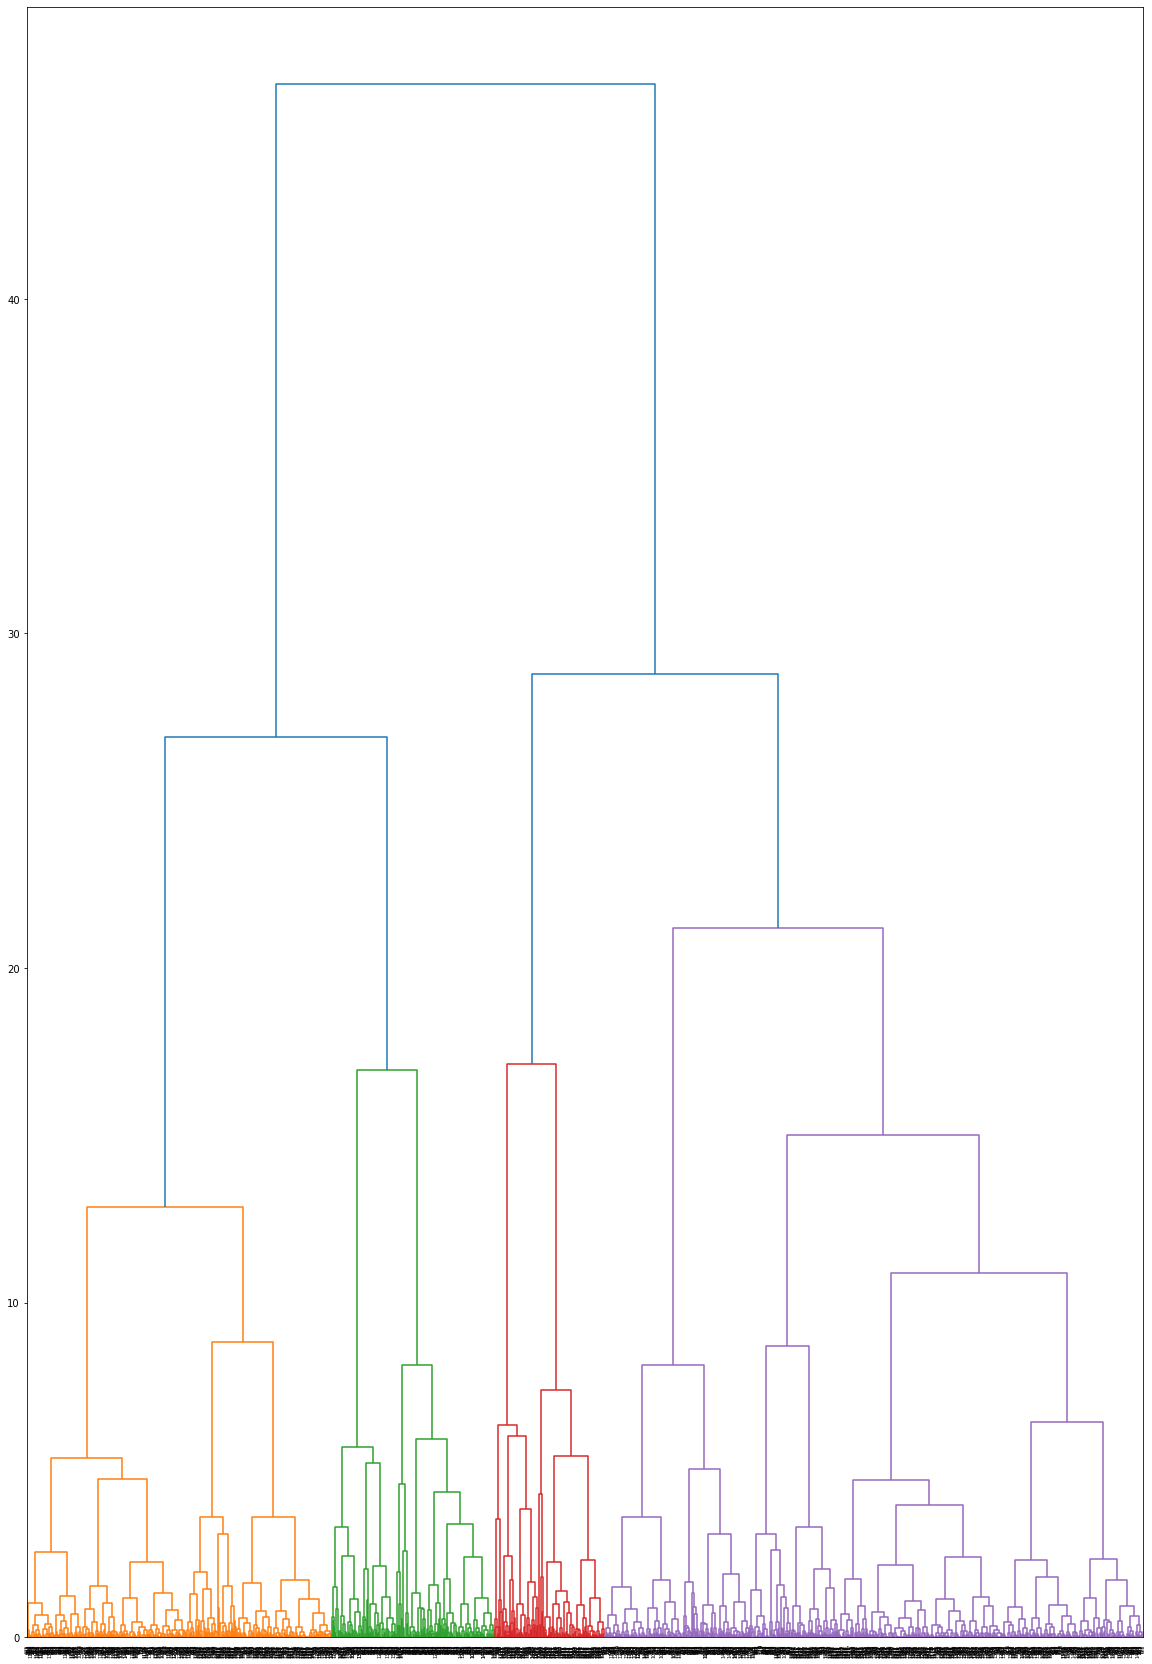

In [20]:
x6 = pd.DataFrame(pt.fit_transform(df[['density','pH']]),columns=['density','pH'])
plt.figure(figsize=(20,30))
z = linkage(x6,'ward')
dendrogram(z,leaf_rotation=90,truncate_mode='level',color_threshold=25)
plt.show()

In [41]:
agc6 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
agc6.fit(x6)

x6['class']= agc6.labels_
x6['class'].value_counts()

0    929
1    670
Name: class, dtype: int64